develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.


#### Import numpy, matplotlib.pyplot and make it inline

In [81]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [82]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [83]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

Text(0, 0.5, 'y')

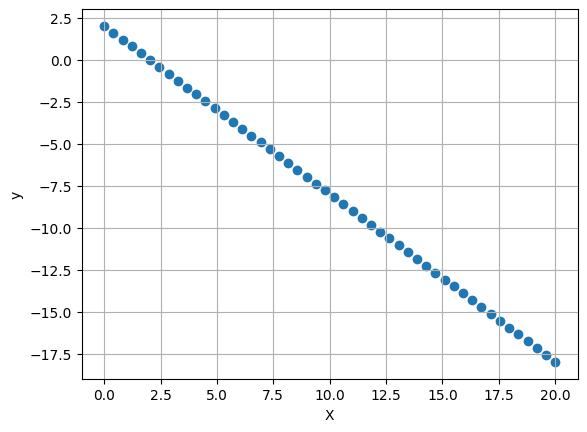

In [84]:
plt.scatter(X,y)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')

function ploting the data

In [ ]:
def plotdata(res,col="blue"):

    plt.plot(res['cost'],marker='o',color=col)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.title('cost per iteration')
    plt.show()

    plt.plot(res['theta0_values'],res['cost'],marker='o',color=col)
    plt.xlabel('theta0')
    plt.ylabel('cost')
    plt.title('cost per theta0')
    plt.show()

    plt.plot(res['theta1_values'],res['cost'],marker='o',color=col)
    plt.xlabel('theta1')
    plt.ylabel('cost')
    plt.title('cost per theta1')
    plt.show()

    plt.plot(X,y,'o',color= col)
    plt.plot(X,res['optimum0']+res['optimum1']*X,color='red') 
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('best fit line')
    plt.show()

    plt.plot(X,y,'o',color= col)
    for i in range(len(res['theta0_values'])):
        plt.plot(X,res['theta0_values'][i]+res['theta1_values'][i]*X,color='red')
    plt.xlabel('X')
    plt.ylabel('y')






### Update Batch GD   implementation (Batch variant) to be Momentum-Based GD 

In [93]:

def momntem(X, y, alpha, max_iterations, stop=0.001, convergence=0.001, gamma=0.9):
    theta0 = 0
    theta1 = 0
    vtheta0 = 0
    vtheta1 = 0
    i=0
    cost= []
    theta0_values = []
    theta1_values = []

    while i < max_iterations:
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        hx = theta0 + theta1 * X
        error = hx - y
        mse = 0.5 * np.linalg.norm(error) ** 2 / len(X)
        cost.append(mse)
        gtheta0 = np.sum(error) / len(X)
        gtheta1 = np.sum(error * X) / len(X)
        
        
        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            print(f"stop in itreration {i} ")

        
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (stop criteria)")
            print(f"stop in itreration {i+1} ")
            print("j=\n", mse)
            
            
            break

        vtheta0 = gamma * vtheta0 + alpha * gtheta0
        vtheta1 = gamma * vtheta1 + alpha * gtheta1

        theta0 = theta0 - vtheta0
        theta1 = theta1 - vtheta1




        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x):{hx}\n")
        print()
        print(f"error vector :\n{error}\n")
        print("j=\n", mse)
        print()
        print("Gradient Vector:/n", gtheta0, gtheta1)
        print()
        print("norm of gradint",np.linalg.norm(np.array([gtheta0, gtheta1])))
        print()
        print("theta0\n", theta0)
        print()
        print("theta1\n", theta1)


        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }




#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [94]:
res= momntem(X, y, 0.0005, 300, stop=0.001, convergence=0.001, gamma=0.5)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


error vector :
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j=
 49.346938775510196

Gradient Vector:/n 8.0 114.69387755102042

norm of gradint 114.97254258164628

theta0
 -0.004

theta1
 -0.05734693877551021
*************

In [95]:
r2_score(y, res['optimum0'] + res['optimum1'] * X)

0.9687892837396442

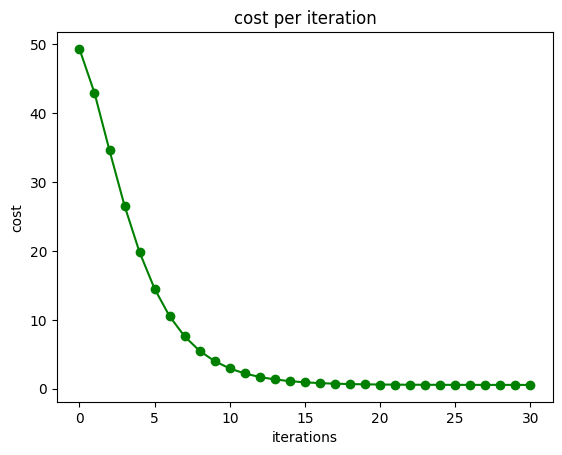

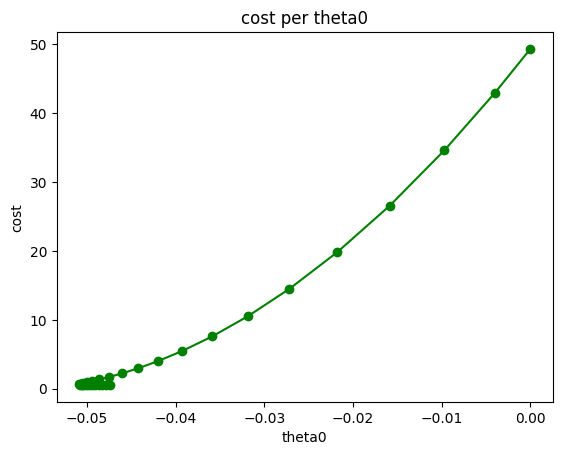

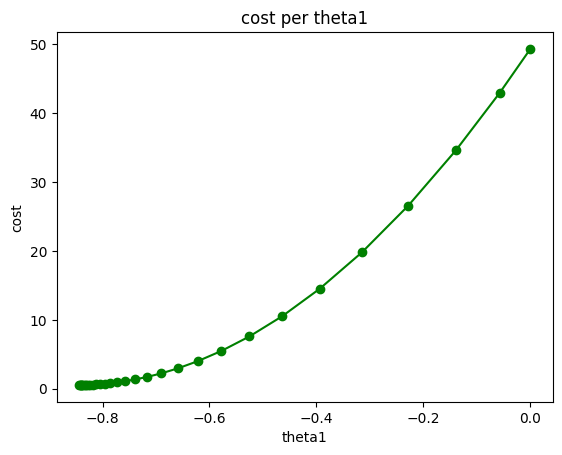

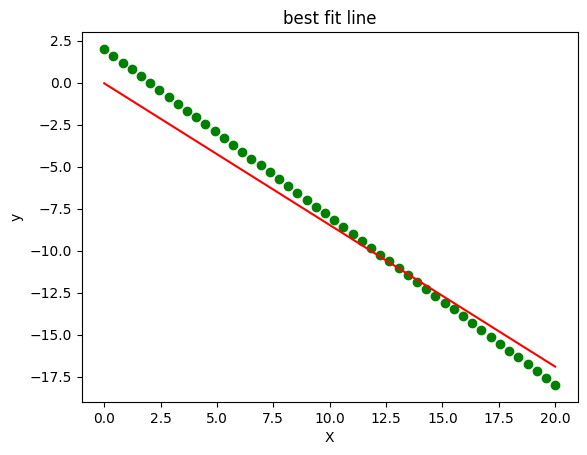

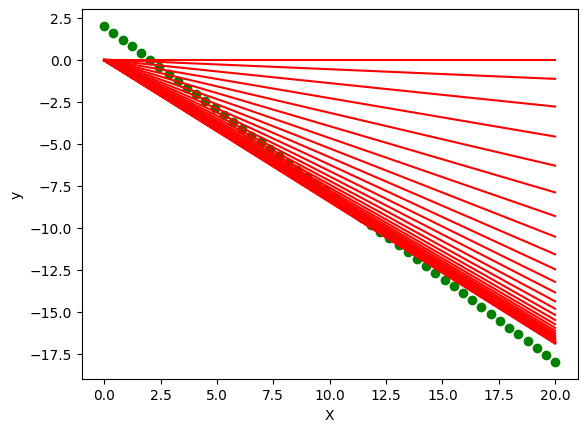

In [96]:
plotdata(res,col="green")

### Update your Batch GD implementation to be NAG 

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [115]:

def nag(X, y, alpha, max_iterations, stop=0.001, convergence=0.001, gamma=0.9):
    theta0 = 0
    theta1 = 0
    i = 0
    cost = []
    theta0_values = []
    theta1_values = []

    vtheta0 = 0  
    vtheta1 = 0  

    while i < max_iterations:
        theta0_values.append(theta0)
        theta1_values.append(theta1)
        hx = theta0 + theta1 * X
        error = hx - y
        mse = 0.5 * np.linalg.norm(error) ** 2 / len(X)
        cost.append(mse)
        gtheta0 = np.sum(error) / len(X)
        gtheta1 = np.sum(error * X) / len(X)
        

        if np.linalg.norm(np.array([gtheta0, gtheta1])) < stop:
            print("Gradient descent has converged using (stop criteria).")
            print(f"Stop in iteration {i} ")
            break

        if len(cost) > 1 and abs(cost[-2] - cost[-1]) < convergence:
            print("Converged based on (convergence criteria)")
            print(f"Stop in iteration {i+1} ")
            print("j=\n", mse)
            break

        
        theta_temp0 = theta0 - gamma * vtheta0
        theta_temp1 = theta1 - gamma * vtheta1

        h_temp = theta_temp0 + theta_temp1 * X

        error_temp = h_temp - y
        gtheta0_temp = np.sum(error_temp) / len(X)
        gtheta1_temp = np.sum(error_temp * X) / len(X)
        vtheta0 = gamma * vtheta0 + alpha * gtheta0_temp
        vtheta1 = gamma * vtheta1 + alpha * gtheta1_temp

        theta0 = theta_temp0 - alpha * gtheta0_temp
        theta1 = theta_temp1 - alpha * gtheta1_temp

        print(f"****************** Iteration {i} ********************\n")
        print(f"h(x): {h_temp}\n")
        print(f"Error vector:\n {error}\n")
        print("j=\n", mse)
        print("Gradient Vector:\n", gtheta0, gtheta1)
        print("Norm of gradient:", np.linalg.norm(np.array([gtheta0, gtheta1])))
        print("Theta0:\n", theta0)
        print("Theta1:\n", theta1)

        i += 1

    return {
        'theta0_values': theta0_values,
        'theta1_values': theta1_values,
        'cost': cost,
        'optimum0': theta0,
        'optimum1': theta1
    }


In [118]:
res=nag(X, y, 0.0005, 300, stop=0.001, convergence=0.001, gamma=0.9)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j=
 49.346938775510196
Gradient Vector:
 8.0 114.69387755102042
Norm of gradient: 114.97254258164628
Theta0:
 -0.004
Theta1:
 -0.05734693877551021
**************

In [119]:
r2_score(y, res['optimum0'] + res['optimum1'] * X)

0.971103130756324

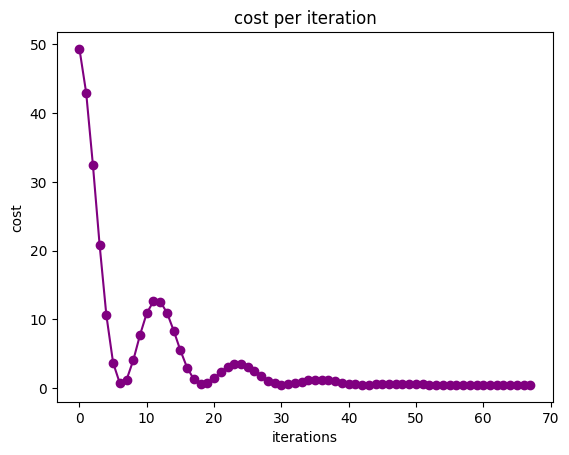

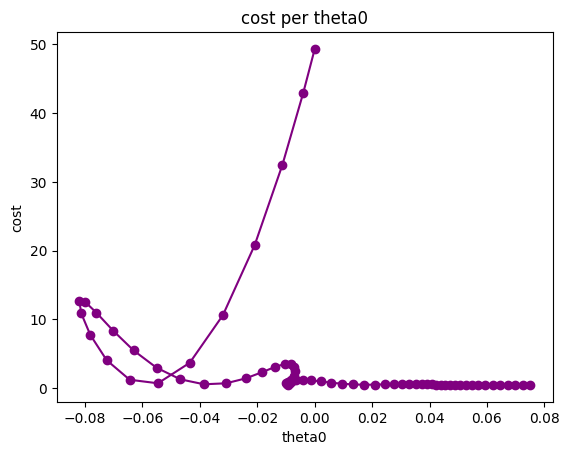

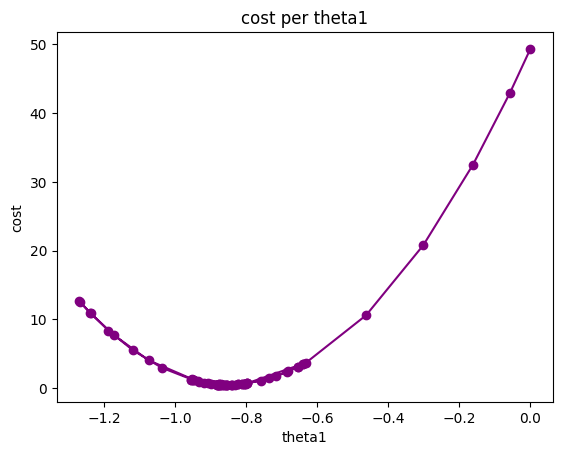

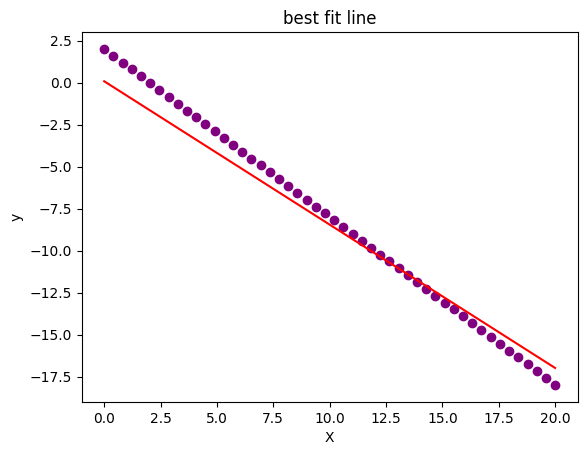

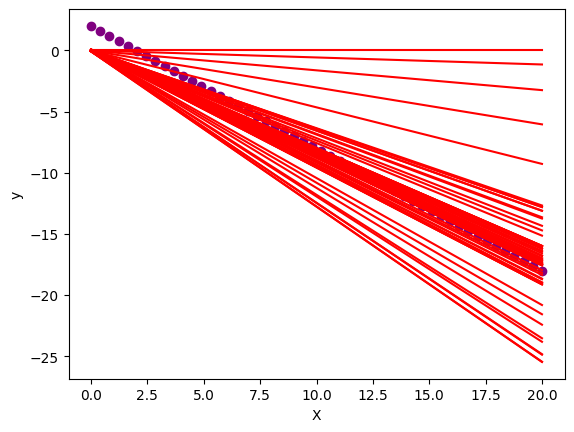

In [122]:
plotdata(re8,col="purple")